In [1]:
from locale import normalize
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
data = pd.read_csv(r'C:\Users\Admin\Downloads\diabetes.csv')
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [2]:
data=data.dropna()
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Text(0, 0.5, 'Count')

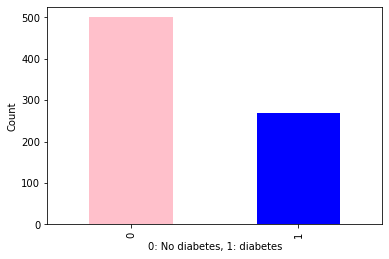

In [8]:
data['Outcome'].value_counts().plot.bar(color=['pink','blue']);
plt.xlabel('0: No diabetes, 1: diabetes')
plt.ylabel('Count')

In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

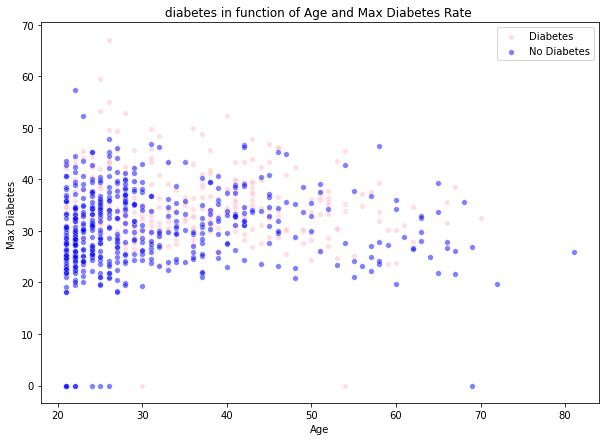

In [13]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=data, x=data.Age[data.Outcome==1], y=data.BMI[data.Outcome==1], color='pink',s=30,alpha=0.5);
sns.scatterplot(data=data, x=data.Age[data.Outcome==0], y=data.BMI[data.Outcome==0], color='blue',s=30,alpha=0.5);
plt.title ('diabetes in function of Age and Max Diabetes Rate ')
plt.xlabel ('Age')
plt.ylabel('Max Diabetes ');
plt.legend(['Diabetes','No Diabetes']);

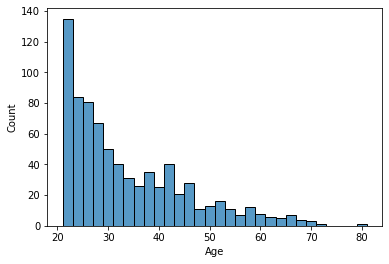

In [14]:
sns.histplot(data=data, x= data['Age'], bins=30);

In [15]:
data.corr()['Outcome'].[:-1]

SyntaxError: invalid syntax (3716592446.py, line 1)

In [16]:
data.corr()['Outcome'][:-1]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Name: Outcome, dtype: float64

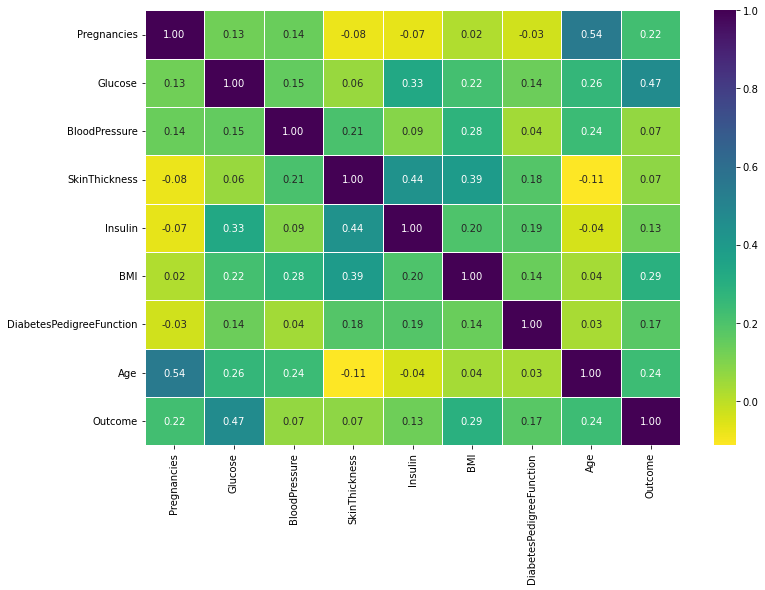

In [19]:
#visualization
corr_matrix=data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, linewidth=0.5,fmt='.2f',cmap='viridis_r');

In [21]:
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [22]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [24]:
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)


In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [33]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'RandomForestClassifer': RandomForestClassifier()
}

# create function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evalute given machine learning models.
    models: a dictionary of different scikit learn machine learning models
    X_train: training date (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test : testing labels
    returns model scores dictionary.
    """
    
    # set random seed
    np.random.seed(42)
    
    # make dictonary to keep scores
    model_scores = {}
    
    # loop through models to fit and score
    for model_name, model in models.items():
        model.fit(X_train, y_train) # fit model
        score = model.score(X_test, y_test) # get score
        model_scores[model_name] = score # put score for each model
        
    return model_scores 

In [34]:
model_scores=fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'LogisticRegression': 0.7467532467532467,
 'KNN': 0.6623376623376623,
 'RandomForestClassifer': 0.7207792207792207}

In [35]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

model_compare.head()

,LogisticRegression,KNN,RandomForestClassifer
accuracy,0.746753,0.662338,0.720779


<AxesSubplot:>

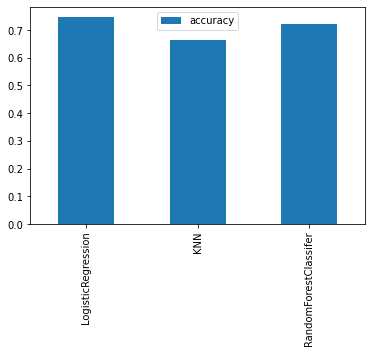

In [36]:
model_compare.T.plot(kind='bar')

In [37]:
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

# set up grid hyperparameter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(), 
                                          log_reg_grid, 
                                          cv=5, 
                                          verbose=True)

# train the model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [38]:
gs_log_reg.best_params_

{'C': 4.281332398719396, 'solver': 'liblinear'}

In [39]:
gs_log_reg.score(X_test, y_test)

0.7597402597402597

In [43]:
y_preds = gs_log_reg.predict(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


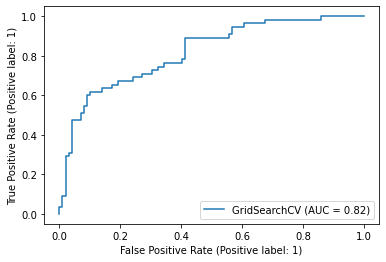

In [44]:
plot_roc_curve(gs_log_reg, X_test, y_test);

In [45]:
confusion_matrix(y_test, y_preds)

array([[80, 19],
       [18, 37]], dtype=int64)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


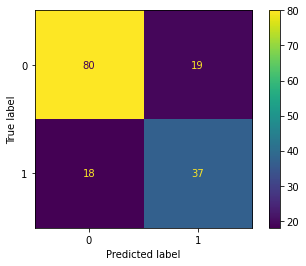

In [46]:
plot_confusion_matrix(gs_log_reg, X_test, y_test);

In [47]:
#Note caafn suwr laij thoong soos ddeer doj chinh xsac cao
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [48]:
gs_log_reg.best_params_

{'C': 4.281332398719396, 'solver': 'liblinear'}

In [49]:
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [51]:
cv_accuracy = cross_val_score(clf, x, y, scoring='accuracy', cv=5)
cv_accuracy

array([0.77272727, 0.73376623, 0.74025974, 0.79084967, 0.74509804])

In [52]:
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.7565401918343094

In [54]:
cv_precision = cross_val_score(clf, x, y, scoring='precision', cv=5)

cv_precision = np.mean(cv_precision)
cv_precision

0.7182633126552249

In [55]:
cv_recall = cross_val_score(clf, x, y, scoring='recall', cv=5)

cv_recall = np.mean(cv_recall)
cv_recall

0.5000698812019566

In [57]:
cv_f1 = cross_val_score(clf, x, y, scoring='f1', cv=5)

cv_f1 = np.mean(cv_f1)
cv_f1

0.5873212219562648

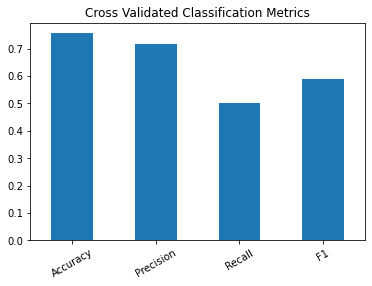

In [58]:
cv_metrics = pd.DataFrame({'Accuracy': cv_accuracy,
                                            'Precision': cv_precision,
                                            'Recall': cv_recall,
                                            'F1': cv_f1},
                                             index=[0])

cv_metrics.T.plot.bar(legend=False);

plt.title('Cross Validated Classification Metrics')
plt.xticks(rotation=30);  

In [59]:
model = LogisticRegression(C=4.281332398719396, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=4.281332398719396, solver='liblinear')

In [60]:
model.coef_

array([[ 0.06547123,  0.0309379 , -0.01542179,  0.00266601, -0.00150609,
         0.08803945,  0.60146172,  0.03234096]])

In [62]:
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [64]:
feature_dict = dict(zip(data.columns, list(model.coef_[0])))

feature_dict

{'Pregnancies': 0.06547122746415446,
 'Glucose': 0.03093789563726737,
 'BloodPressure': -0.015421785657005322,
 'SkinThickness': 0.002666011796575812,
 'Insulin': -0.0015060863611909422,
 'BMI': 0.08803945468811429,
 'DiabetesPedigreeFunction': 0.6014617158527688,
 'Age': 0.03234096071198454}

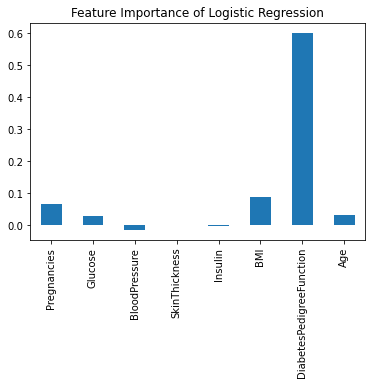

In [65]:
feature_df = pd.DataFrame(feature_dict, index=[0])

feature_df.T.plot.bar(title='Feature Importance of Logistic Regression', legend=False);

In [66]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [67]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [75]:
def predict_Diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,
       BMI, DiabetesPedigreeFunction, Age):    
    #loc_index = np.where(X.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = Pregnancies
    X[1] = Glucose
    X[2] = BloodPressure
    X[3] = SkinThickness
    X[4] = Insulin
    X[5] =BMI
    X[6] = DiabetesPedigreeFunction
    X[7] = Age
    #if loc_index >= 0:
       #x[loc_index] = 1

    return gs_log_reg.predict([X])[0]

In [76]:
predict_Diabetes(6,148,72,35,0,33.6,0.627,50
)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1